In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
#Import the dataset
df = pd.read_csv("mall_customers.csv")


In [8]:
# 2. Data Preparation
# Encode the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [9]:
# Select features for clustering
features = ['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score']

In [10]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [11]:
# 3. Apply DBSCAN
# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

In [12]:
# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

In [13]:
# Print the resulting clusters
print(df.head())

   CustomerID  Gender  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1       1   19                  15              39       -1
1           2       1   21                  15              81       -1
2           3       0   20                  16               6       -1
3           4       0   23                  16              77       -1
4           5       0   31                  17              40       -1


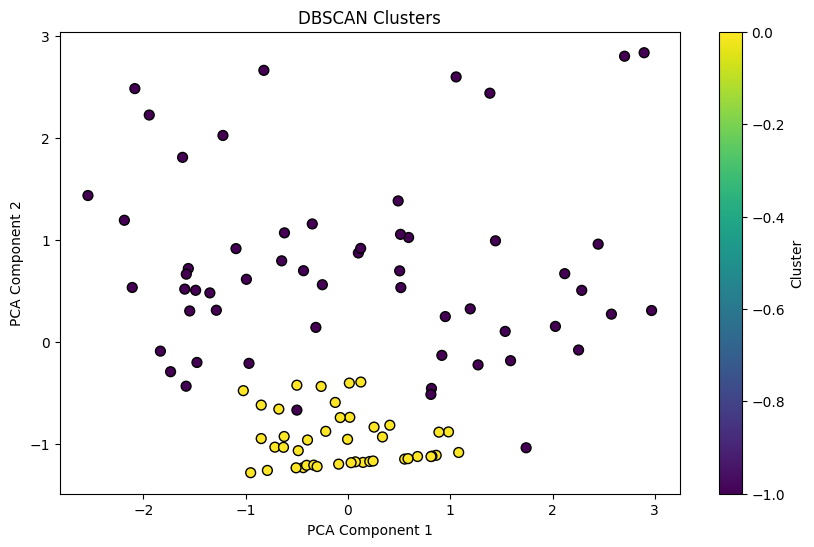

In [14]:
# 4. Visualize the Clusters
# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()